In [17]:
import scipy.io as sio
import numpy as np
from sklearn.model_selection import train_test_split

fpath = 'traindata.mat'
change2 = -1

load_data = sio.loadmat(fpath)['data']
data = np.array(load_data)
label = np.where(data[:,56].astype(int)==2, change2, 1)
data = data[:,:56]

X_train, X_test, y_train, y_test = train_test_split(
    data, label, test_size=0.3, random_state=42)
print X_train.shape,X_test.shape
print y_train.shape

(7000, 56) (3000, 56)
(7000,)


In [68]:
class WeakClassifer:
    def __init__(self,W):
        self.W = W
    def fit(self,x,y):
        self.axis = np.random.randint(0,x.shape[1])
        tempx = x[:,self.axis]
        sort_idx = np.argsort(tempx)
        sort_y = y[sort_idx]
        sort_W = self.W[sort_idx]
        leftneg = True
        loss = float('inf')
        idx = 0
        for i in xrange(x.shape[0]):
            y_pred = np.concatenate((np.ones([i]) * -1,np.ones([x.shape[0]-i])))
            leftneg_loss = np.sum(sort_W[y_pred!=sort_y])
            y_pred = np.concatenate((np.ones([i]),np.ones([x.shape[0]-i])*-1))
            rightneg_loss = np.sum(sort_W[y_pred!=sort_y])
            if leftneg_loss > rightneg_loss:
                leftneg = False
            if leftneg:
                if leftneg_loss < loss:
                    idx = i
                    loss = leftneg_loss
            else:
                if rightneg_loss < loss:
                    idx = i
                    loss = rightneg_loss
        self.threshold = tempx[sort_idx[idx]]
        self.leftneg = leftneg
    def predict(self,x):
        tempx = x[:,self.axis]
        y_pred = np.ones(x.shape[0])
        if self.leftneg:
            y_pred[tempx<self.threshold] = -1
        else:
            y_pred[tempx>=self.threshold] = -1
        return y_pred

epoch: 0 accuaracy on test 0.539


epoch: 1 accuaracy on test 0.539


epoch: 2 accuaracy on test 0.564333333333


epoch: 3 accuaracy on test 0.564


epoch: 4 accuaracy on test 0.580333333333


epoch: 5 accuaracy on test 0.58


epoch: 6 accuaracy on test 0.582333333333


epoch: 7 accuaracy on test 0.584666666667


epoch: 8 accuaracy on test 0.576


epoch: 9 accuaracy on test 0.593666666667


epoch: 10 accuaracy on test 0.590666666667


epoch: 11 accuaracy on test 0.592666666667


epoch: 12 accuaracy on test 0.594


epoch: 13 accuaracy on test 0.692333333333


epoch: 14 accuaracy on test 0.718


epoch: 15 accuaracy on test 0.71


epoch: 16 accuaracy on test 0.713


epoch: 17 accuaracy on test 0.715333333333


epoch: 18 accuaracy on test 0.728


epoch: 19 accuaracy on test 0.725


epoch: 20 accuaracy on test 0.723


epoch: 21 accuaracy on test 0.722


epoch: 22 accuaracy on test 0.722666666667


epoch: 23 accuaracy on test 0.729666666667


epoch: 24 accuaracy on test 0.718


epoch: 25 accuaracy on test 0.714333333333


epoch: 26 accuaracy on test 0.722666666667


epoch: 27 accuaracy on test 0.718666666667


epoch: 28 accuaracy on test 0.714


epoch: 29 accuaracy on test 0.724666666667


epoch: 30 accuaracy on test 0.722


epoch: 31 accuaracy on test 0.72


epoch: 32 accuaracy on test 0.726333333333


epoch: 33 accuaracy on test 0.731666666667


epoch: 34 accuaracy on test 0.738


epoch: 35 accuaracy on test 0.733333333333


epoch: 36 accuaracy on test 0.739333333333


epoch: 37 accuaracy on test 0.739333333333


epoch: 38 accuaracy on test 0.74


epoch: 39 accuaracy on test 0.746


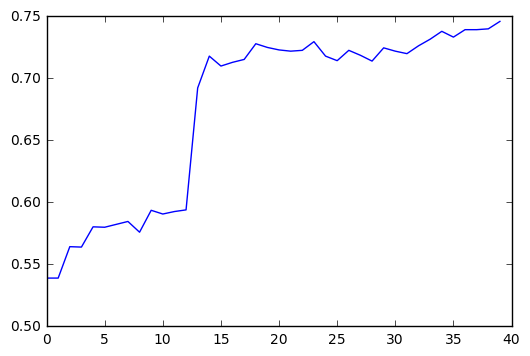

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epochs = 40
dt = np.ones([X_train.shape[0]]) / X_train.shape[0]
H = {}
a = {}
pred_array = []
for t in xrange(epochs):
    H[t] = WeakClassifer(dt)
    H[t].fit(X_train,y_train)
    y_pred = H[t].predict(X_train)
    et = np.sum(dt[y_pred!=y_train])
    if et == 0.0: break
    a[t] = 0.5 * (np.log(1.0-et) - np.log(et))
    Zt = np.sum(dt * np.exp(-a[t]*y_train*y_pred))
    dt = dt * np.exp(-a[t]*y_train*y_pred) / Zt
    #eval
    
    y_pred = 0
    for k,v in H.iteritems():
        y_pred += a[k] * v.predict(X_test)
    y_pred[y_pred>0] = 1
    y_pred[y_pred<=0] = -1
    pred_array.append(metrics.accuracy_score(y_test,y_pred))
    print "epoch:",t,"accuaracy on test",metrics.accuracy_score(y_test,y_pred)
plt.plot(range(epochs),pred_array)
plt.show()

In [13]:
a = {}
for i in range(5):
    a[i] = i
print a

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


In [16]:
import keras
from keras.layers import Dense,Activation
from keras.models import Model,Input
from keras.callbacks import TensorBoard
import os

batch_size = 50
save_dir= "save_models"
model_name = 'model'
epochs = 20

input = Input(shape=[56])
x = Dense(5,activation='relu')(input)
x = Dense(1)(x)
predications = Activation('sigmoid')(x)

model = Model(inputs=input,outputs=predications)
model.compile(optimizer='sgd',metrics=['accuracy'],loss='binary_crossentropy')

log_dir = "logs"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
#tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1,batch_size=batch_size)

model.fit(X_train, y_train, batch_size=batch_size,
          epochs=epochs, validation_data=(X_test, y_test), shuffle=True)
          #callbacks=[tensorboard])

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Train on 7000 samples, validate on 3000 samples
Epoch 1/20
  50/7000 [..............................] - ETA: 11s - loss: 1.6416 - acc: 0.4800

 750/7000 [==>...........................] - ETA: 1s - loss: 1.0379 - acc: 0.5773 

1200/7000 [====>.........................] - ETA: 0s - loss: 0.9784 - acc: 0.5775

1950/7000 [=======>......................] - ETA: 0s - loss: 0.8739 - acc: 0.6072

2500/7000 [=========>....................] - ETA: 0s - loss: 0.8298 - acc: 0.6172

3050/7000 [============>.................] - ETA: 0s - loss: 0.7919 - acc: 0.6282

3600/7000 [==============>...............] - ETA: 0s - loss: 0.7558 - acc: 0.6439

4200/7000 [=================>............] - ETA: 0s - loss: 0.7240 - acc: 0.6595

4800/7000 [===================>..........] - ETA: 0s - loss: 0.7005 - acc: 0.6694

5250/7000 [=====================>........] - ETA: 0s - loss: 0.6843 - acc: 0.6760

5850/7000 [========================>.....] - ETA: 0s - loss: 0.6631 - acc: 0.6832

6550/7000 [===========================>..] - ETA: 0s - loss: 0.6436 - acc: 0.6931

7000/7000 [==============================] - 0s - loss: 0.6317 - acc: 0.6977 - val_loss: 0.4592 - val_acc: 0.7780


Epoch 2/20
  50/7000 [..............................] - ETA: 0s - loss: 0.4408 - acc: 0.8000

 600/7000 [=>............................] - ETA: 0s - loss: 0.4567 - acc: 0.7717

1450/7000 [=====>........................] - ETA: 0s - loss: 0.4475 - acc: 0.7731

2450/7000 [=========>....................] - ETA: 0s - loss: 0.4350 - acc: 0.7747

3400/7000 [=============>................] - ETA: 0s - loss: 0.4243 - acc: 0.7776

4350/7000 [=================>............] - ETA: 0s - loss: 0.4202 - acc: 0.7793

5250/7000 [=====================>........] - ETA: 0s - loss: 0.4171 - acc: 0.7794

6200/7000 [=========================>....] - ETA: 0s - loss: 0.4075 - acc: 0.7852

7000/7000 [==============================] - 0s - loss: 0.4075 - acc: 0.7856 - val_loss: 0.3616 - val_acc: 0.8140


Epoch 3/20
  50/7000 [..............................] - ETA: 0s - loss: 0.3610 - acc: 0.8400

 600/7000 [=>............................] - ETA: 0s - loss: 0.3529 - acc: 0.8117

1500/7000 [=====>........................] - ETA: 0s - loss: 0.3485 - acc: 0.8173

2350/7000 [=========>....................] - ETA: 0s - loss: 0.3462 - acc: 0.8179

3250/7000 [============>.................] - ETA: 0s - loss: 0.3459 - acc: 0.8200

4200/7000 [=================>............] - ETA: 0s - loss: 0.3355 - acc: 0.8290

5100/7000 [====================>.........] - ETA: 0s - loss: 0.3328 - acc: 0.8302

6050/7000 [========================>.....] - ETA: 0s - loss: 0.3309 - acc: 0.8302

6950/7000 [============================>.] - ETA: 0s - loss: 0.3324 - acc: 0.8308

7000/7000 [==============================] - 0s - loss: 0.3325 - acc: 0.8309 - val_loss: 0.3039 - val_acc: 0.8467


Epoch 4/20
  50/7000 [..............................] - ETA: 0s - loss: 0.1599 - acc: 0.9200

 550/7000 [=>............................] - ETA: 0s - loss: 0.3127 - acc: 0.8345

1500/7000 [=====>........................] - ETA: 0s - loss: 0.3014 - acc: 0.8413

2500/7000 [=========>....................] - ETA: 0s - loss: 0.3045 - acc: 0.8440

3400/7000 [=============>................] - ETA: 0s - loss: 0.3018 - acc: 0.8494

4350/7000 [=================>............] - ETA: 0s - loss: 0.2941 - acc: 0.8552

5300/7000 [=====================>........] - ETA: 0s - loss: 0.2884 - acc: 0.8585

6250/7000 [=========================>....] - ETA: 0s - loss: 0.2882 - acc: 0.8574

7000/7000 [==============================] - 0s - loss: 0.2879 - acc: 0.8583 - val_loss: 0.2667 - val_acc: 0.8680


Epoch 5/20
  50/7000 [..............................] - ETA: 0s - loss: 0.1932 - acc: 0.9400

 550/7000 [=>............................] - ETA: 0s - loss: 0.2654 - acc: 0.8727

1550/7000 [=====>........................] - ETA: 0s - loss: 0.2588 - acc: 0.8806

2500/7000 [=========>....................] - ETA: 0s - loss: 0.2672 - acc: 0.8700

3450/7000 [=============>................] - ETA: 0s - loss: 0.2600 - acc: 0.8748

4400/7000 [=================>............] - ETA: 0s - loss: 0.2614 - acc: 0.8723

5300/7000 [=====================>........] - ETA: 0s - loss: 0.2573 - acc: 0.8751

6250/7000 [=========================>....] - ETA: 0s - loss: 0.2593 - acc: 0.8739

7000/7000 [==============================] - 0s - loss: 0.2563 - acc: 0.8766 - val_loss: 0.2391 - val_acc: 0.8890


Epoch 6/20
  50/7000 [..............................] - ETA: 0s - loss: 0.1941 - acc: 0.9000

 700/7000 [==>...........................] - ETA: 0s - loss: 0.2516 - acc: 0.8986

1500/7000 [=====>........................] - ETA: 0s - loss: 0.2373 - acc: 0.8967

2450/7000 [=========>....................] - ETA: 0s - loss: 0.2291 - acc: 0.8980

3450/7000 [=============>................] - ETA: 0s - loss: 0.2324 - acc: 0.8939

4400/7000 [=================>............] - ETA: 0s - loss: 0.2357 - acc: 0.8909

5250/7000 [=====================>........] - ETA: 0s - loss: 0.2340 - acc: 0.8918

6200/7000 [=========================>....] - ETA: 0s - loss: 0.2342 - acc: 0.8903

7000/7000 [==============================] - 0s - loss: 0.2319 - acc: 0.8906 - val_loss: 0.2188 - val_acc: 0.8990


Epoch 7/20
  50/7000 [..............................] - ETA: 0s - loss: 0.1768 - acc: 0.9400

 650/7000 [=>............................] - ETA: 0s - loss: 0.1994 - acc: 0.9277

1600/7000 [=====>........................] - ETA: 0s - loss: 0.2146 - acc: 0.9112

2600/7000 [==========>...................] - ETA: 0s - loss: 0.2228 - acc: 0.9004

3550/7000 [==============>...............] - ETA: 0s - loss: 0.2180 - acc: 0.8997

4550/7000 [==================>...........] - ETA: 0s - loss: 0.2192 - acc: 0.8949

5500/7000 [======================>.......] - ETA: 0s - loss: 0.2156 - acc: 0.8973

6400/7000 [==========================>...] - ETA: 0s - loss: 0.2136 - acc: 0.8959

7000/7000 [==============================] - 0s - loss: 0.2117 - acc: 0.8979 - val_loss: 0.2007 - val_acc: 0.9103


Epoch 8/20
  50/7000 [..............................] - ETA: 0s - loss: 0.1615 - acc: 0.9000

 550/7000 [=>............................] - ETA: 0s - loss: 0.1973 - acc: 0.9055

1450/7000 [=====>........................] - ETA: 0s - loss: 0.1900 - acc: 0.9090

2350/7000 [=========>....................] - ETA: 0s - loss: 0.1908 - acc: 0.9085

3300/7000 [=============>................] - ETA: 0s - loss: 0.1886 - acc: 0.9091

4200/7000 [=================>............] - ETA: 0s - loss: 0.1921 - acc: 0.9090

5150/7000 [=====================>........] - ETA: 0s - loss: 0.1928 - acc: 0.9078

6050/7000 [========================>.....] - ETA: 0s - loss: 0.1936 - acc: 0.9076

6950/7000 [============================>.] - ETA: 0s - loss: 0.1945 - acc: 0.9068

7000/7000 [==============================] - 0s - loss: 0.1948 - acc: 0.9067 - val_loss: 0.1871 - val_acc: 0.9100


Epoch 9/20
  50/7000 [..............................] - ETA: 0s - loss: 0.2042 - acc: 0.8800

 650/7000 [=>............................] - ETA: 0s - loss: 0.1969 - acc: 0.8954

1600/7000 [=====>........................] - ETA: 0s - loss: 0.1908 - acc: 0.9044

2500/7000 [=========>....................] - ETA: 0s - loss: 0.1816 - acc: 0.9128

3400/7000 [=============>................] - ETA: 0s - loss: 0.1833 - acc: 0.9103

4300/7000 [=================>............] - ETA: 0s - loss: 0.1811 - acc: 0.9140

5250/7000 [=====================>........] - ETA: 0s - loss: 0.1844 - acc: 0.9112

6200/7000 [=========================>....] - ETA: 0s - loss: 0.1832 - acc: 0.9127

7000/7000 [==============================] - 0s - loss: 0.1808 - acc: 0.9136 - val_loss: 0.1732 - val_acc: 0.9177


Epoch 10/20
  50/7000 [..............................] - ETA: 0s - loss: 0.1442 - acc: 0.9600

 650/7000 [=>............................] - ETA: 0s - loss: 0.1726 - acc: 0.9077

1650/7000 [======>.......................] - ETA: 0s - loss: 0.1701 - acc: 0.9164

2600/7000 [==========>...................] - ETA: 0s - loss: 0.1715 - acc: 0.9138

3500/7000 [==============>...............] - ETA: 0s - loss: 0.1732 - acc: 0.9120

4450/7000 [==================>...........] - ETA: 0s - loss: 0.1722 - acc: 0.9151

5400/7000 [======================>.......] - ETA: 0s - loss: 0.1687 - acc: 0.9169

6300/7000 [==========================>...] - ETA: 0s - loss: 0.1685 - acc: 0.9179

7000/7000 [==============================] - 0s - loss: 0.1676 - acc: 0.9187 - val_loss: 0.1614 - val_acc: 0.9220


Epoch 11/20
  50/7000 [..............................] - ETA: 0s - loss: 0.2018 - acc: 0.8600

 550/7000 [=>............................] - ETA: 0s - loss: 0.1609 - acc: 0.9273

1000/7000 [===>..........................] - ETA: 0s - loss: 0.1550 - acc: 0.9270

1500/7000 [=====>........................] - ETA: 0s - loss: 0.1626 - acc: 0.9180

2000/7000 [=======>......................] - ETA: 0s - loss: 0.1623 - acc: 0.9195

2450/7000 [=========>....................] - ETA: 0s - loss: 0.1605 - acc: 0.9204

2900/7000 [===========>..................] - ETA: 0s - loss: 0.1588 - acc: 0.9214

3450/7000 [=============>................] - ETA: 0s - loss: 0.1597 - acc: 0.9209

3950/7000 [===============>..............] - ETA: 0s - loss: 0.1604 - acc: 0.9208

4800/7000 [===================>..........] - ETA: 0s - loss: 0.1574 - acc: 0.9233

5300/7000 [=====================>........] - ETA: 0s - loss: 0.1557 - acc: 0.9245

5950/7000 [========================>.....] - ETA: 0s - loss: 0.1537 - acc: 0.9254

6850/7000 [============================>.] - ETA: 0s - loss: 0.1560 - acc: 0.9231

7000/7000 [==============================] - 0s - loss: 0.1566 - acc: 0.9226 - val_loss: 0.1517 - val_acc: 0.9243


Epoch 12/20
  50/7000 [..............................] - ETA: 0s - loss: 0.1692 - acc: 0.8800

 550/7000 [=>............................] - ETA: 0s - loss: 0.1557 - acc: 0.9236

1400/7000 [=====>........................] - ETA: 0s - loss: 0.1638 - acc: 0.9143

2350/7000 [=========>....................] - ETA: 0s - loss: 0.1496 - acc: 0.9238

3400/7000 [=============>................] - ETA: 0s - loss: 0.1518 - acc: 0.9238

4450/7000 [==================>...........] - ETA: 0s - loss: 0.1488 - acc: 0.9249

5450/7000 [======================>.......] - ETA: 0s - loss: 0.1482 - acc: 0.9264

6300/7000 [==========================>...] - ETA: 0s - loss: 0.1480 - acc: 0.9259

7000/7000 [==============================] - 0s - loss: 0.1468 - acc: 0.9260 - val_loss: 0.1414 - val_acc: 0.9277


Epoch 13/20
  50/7000 [..............................] - ETA: 0s - loss: 0.1520 - acc: 0.9000

 650/7000 [=>............................] - ETA: 0s - loss: 0.1688 - acc: 0.9092

1550/7000 [=====>........................] - ETA: 0s - loss: 0.1460 - acc: 0.9226

2500/7000 [=========>....................] - ETA: 0s - loss: 0.1494 - acc: 0.9196

3450/7000 [=============>................] - ETA: 0s - loss: 0.1464 - acc: 0.9232

4400/7000 [=================>............] - ETA: 0s - loss: 0.1453 - acc: 0.9239

5350/7000 [=====================>........] - ETA: 0s - loss: 0.1409 - acc: 0.9264

6350/7000 [==========================>...] - ETA: 0s - loss: 0.1386 - acc: 0.9279

7000/7000 [==============================] - 0s - loss: 0.1381 - acc: 0.9283 - val_loss: 0.1335 - val_acc: 0.9297


Epoch 14/20
  50/7000 [..............................] - ETA: 0s - loss: 0.1081 - acc: 0.9600

 650/7000 [=>............................] - ETA: 0s - loss: 0.1222 - acc: 0.9415

1600/7000 [=====>........................] - ETA: 0s - loss: 0.1291 - acc: 0.9331

2600/7000 [==========>...................] - ETA: 0s - loss: 0.1307 - acc: 0.9319

3550/7000 [==============>...............] - ETA: 0s - loss: 0.1319 - acc: 0.9315

4450/7000 [==================>...........] - ETA: 0s - loss: 0.1307 - acc: 0.9319

5400/7000 [======================>.......] - ETA: 0s - loss: 0.1298 - acc: 0.9317

5950/7000 [========================>.....] - ETA: 0s - loss: 0.1297 - acc: 0.9319

6400/7000 [==========================>...] - ETA: 0s - loss: 0.1304 - acc: 0.9308

6850/7000 [============================>.] - ETA: 0s - loss: 0.1307 - acc: 0.9301

7000/7000 [==============================] - 0s - loss: 0.1303 - acc: 0.9303 - val_loss: 0.1271 - val_acc: 0.9313


Epoch 15/20
  50/7000 [..............................] - ETA: 0s - loss: 0.1202 - acc: 0.9400

 600/7000 [=>............................] - ETA: 0s - loss: 0.1216 - acc: 0.9317

1100/7000 [===>..........................] - ETA: 0s - loss: 0.1197 - acc: 0.9300

1550/7000 [=====>........................] - ETA: 0s - loss: 0.1303 - acc: 0.9206

2100/7000 [========>.....................] - ETA: 0s - loss: 0.1282 - acc: 0.9271

3050/7000 [============>.................] - ETA: 0s - loss: 0.1250 - acc: 0.9298

3800/7000 [===============>..............] - ETA: 0s - loss: 0.1227 - acc: 0.9316

4550/7000 [==================>...........] - ETA: 0s - loss: 0.1234 - acc: 0.9316

5550/7000 [======================>.......] - ETA: 0s - loss: 0.1239 - acc: 0.9312

6450/7000 [==========================>...] - ETA: 0s - loss: 0.1237 - acc: 0.9313

7000/7000 [==============================] - 0s - loss: 0.1233 - acc: 0.9319 - val_loss: 0.1205 - val_acc: 0.9343


Epoch 16/20
  50/7000 [..............................] - ETA: 0s - loss: 0.1408 - acc: 0.9400

 600/7000 [=>............................] - ETA: 0s - loss: 0.1287 - acc: 0.9367

1550/7000 [=====>........................] - ETA: 0s - loss: 0.1208 - acc: 0.9465

2500/7000 [=========>....................] - ETA: 0s - loss: 0.1144 - acc: 0.9440

3450/7000 [=============>................] - ETA: 0s - loss: 0.1160 - acc: 0.9391

4400/7000 [=================>............] - ETA: 0s - loss: 0.1177 - acc: 0.9357

5400/7000 [======================>.......] - ETA: 0s - loss: 0.1181 - acc: 0.9348

6350/7000 [==========================>...] - ETA: 0s - loss: 0.1160 - acc: 0.9350

7000/7000 [==============================] - 0s - loss: 0.1171 - acc: 0.9341 - val_loss: 0.1148 - val_acc: 0.9353


Epoch 17/20
  50/7000 [..............................] - ETA: 0s - loss: 0.1549 - acc: 0.8600

 550/7000 [=>............................] - ETA: 0s - loss: 0.1099 - acc: 0.9345

1550/7000 [=====>........................] - ETA: 0s - loss: 0.1168 - acc: 0.9303

2450/7000 [=========>....................] - ETA: 0s - loss: 0.1126 - acc: 0.9355

3200/7000 [============>.................] - ETA: 0s - loss: 0.1102 - acc: 0.9375

4100/7000 [================>.............] - ETA: 0s - loss: 0.1110 - acc: 0.9356

4950/7000 [====================>.........] - ETA: 0s - loss: 0.1091 - acc: 0.9362

5800/7000 [=======================>......] - ETA: 0s - loss: 0.1098 - acc: 0.9366

6550/7000 [===========================>..] - ETA: 0s - loss: 0.1122 - acc: 0.9357

7000/7000 [==============================] - 0s - loss: 0.1116 - acc: 0.9359 - val_loss: 0.1098 - val_acc: 0.9373


Epoch 18/20
  50/7000 [..............................] - ETA: 0s - loss: 0.0948 - acc: 0.9400

 550/7000 [=>............................] - ETA: 0s - loss: 0.1158 - acc: 0.9364

1350/7000 [====>.........................] - ETA: 0s - loss: 0.1133 - acc: 0.9333

1850/7000 [======>.......................] - ETA: 0s - loss: 0.1074 - acc: 0.9389

2400/7000 [=========>....................] - ETA: 0s - loss: 0.1070 - acc: 0.9350

3000/7000 [===========>..................] - ETA: 0s - loss: 0.1070 - acc: 0.9360

3600/7000 [==============>...............] - ETA: 0s - loss: 0.1084 - acc: 0.9358

4050/7000 [================>.............] - ETA: 0s - loss: 0.1092 - acc: 0.9358

4600/7000 [==================>...........] - ETA: 0s - loss: 0.1080 - acc: 0.9376

5450/7000 [======================>.......] - ETA: 0s - loss: 0.1084 - acc: 0.9367

6300/7000 [==========================>...] - ETA: 0s - loss: 0.1072 - acc: 0.9378

6950/7000 [============================>.] - ETA: 0s - loss: 0.1067 - acc: 0.9378

7000/7000 [==============================] - 0s - loss: 0.1067 - acc: 0.9381 - val_loss: 0.1055 - val_acc: 0.9383


Epoch 19/20
  50/7000 [..............................] - ETA: 0s - loss: 0.1123 - acc: 0.9000

 550/7000 [=>............................] - ETA: 0s - loss: 0.0906 - acc: 0.9364

1500/7000 [=====>........................] - ETA: 0s - loss: 0.1051 - acc: 0.9333

2500/7000 [=========>....................] - ETA: 0s - loss: 0.1065 - acc: 0.9356

3450/7000 [=============>................] - ETA: 0s - loss: 0.1052 - acc: 0.9380

4400/7000 [=================>............] - ETA: 0s - loss: 0.1034 - acc: 0.9389

5300/7000 [=====================>........] - ETA: 0s - loss: 0.1039 - acc: 0.9387

6250/7000 [=========================>....] - ETA: 0s - loss: 0.1024 - acc: 0.9395

7000/7000 [==============================] - 0s - loss: 0.1025 - acc: 0.9390 - val_loss: 0.1015 - val_acc: 0.9403


Epoch 20/20
  50/7000 [..............................] - ETA: 0s - loss: 0.0979 - acc: 0.9400

 600/7000 [=>............................] - ETA: 0s - loss: 0.0946 - acc: 0.9467

1550/7000 [=====>........................] - ETA: 0s - loss: 0.0978 - acc: 0.9413

2500/7000 [=========>....................] - ETA: 0s - loss: 0.0978 - acc: 0.9424

3450/7000 [=============>................] - ETA: 0s - loss: 0.0999 - acc: 0.9403

4450/7000 [==================>...........] - ETA: 0s - loss: 0.0987 - acc: 0.9418

5100/7000 [====================>.........] - ETA: 0s - loss: 0.0985 - acc: 0.9418

5600/7000 [=======================>......] - ETA: 0s - loss: 0.0983 - acc: 0.9412

6150/7000 [=========================>....] - ETA: 0s - loss: 0.0978 - acc: 0.9408

6750/7000 [===========================>..] - ETA: 0s - loss: 0.0985 - acc: 0.9401

7000/7000 [==============================] - 0s - loss: 0.0985 - acc: 0.9397 - val_loss: 0.0977 - val_acc: 0.9410

Saved trained model at save_models/model 


In [17]:
model.evaluate(X_test,y_test,batch_size=3000)

3000/3000 [==============================] - 0s

[0.097738020122051239, 0.94099998474121094]

In [2]:
from sklearn import svm
from sklearn import metrics
clf = svm.SVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print metrics.accuracy_score(y_test,y_pred)

0.966333333333


In [14]:
from mlpy import KFDAC
from mlpy import KernelGaussian
model = KFDAC(kernel=KernelGaussian())
model.learn(X_train,y_train)
y_pred = model.pred(X_test)
print metrics.accuracy_score(y_test,y_pred)

0.720666666667


In [20]:
from mlpy import KFDAC
from mlpy import KernelLinear
model = KFDAC(kernel=KernelLinear())
model.learn(X_train,y_train)
y_pred = model.pred(X_test)
print metrics.accuracy_score(y_test,y_pred)

0.494
